<a href="https://colab.research.google.com/github/MarvDaParndAndy/MAT-421-Material/blob/main/MA_421_Module_H_Sec_22_4%2C_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAT 421 Module H: Sections 22.4, 22.5, 22.6
Jacob Camacho

# Section 22.4: Numerical Error and Instability
Accuracy - A scheme's ability to get close to the exact solution, which is usually unknown as a function of the step-size h. O(h^p)

Stability - A scheme's ability to keep the error from growing as it integrates forward in time. In the case the error doesn't grow, then the scheme is stable, otherwise it is unstable

<ipython-input-2-a7325cd2ad29>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


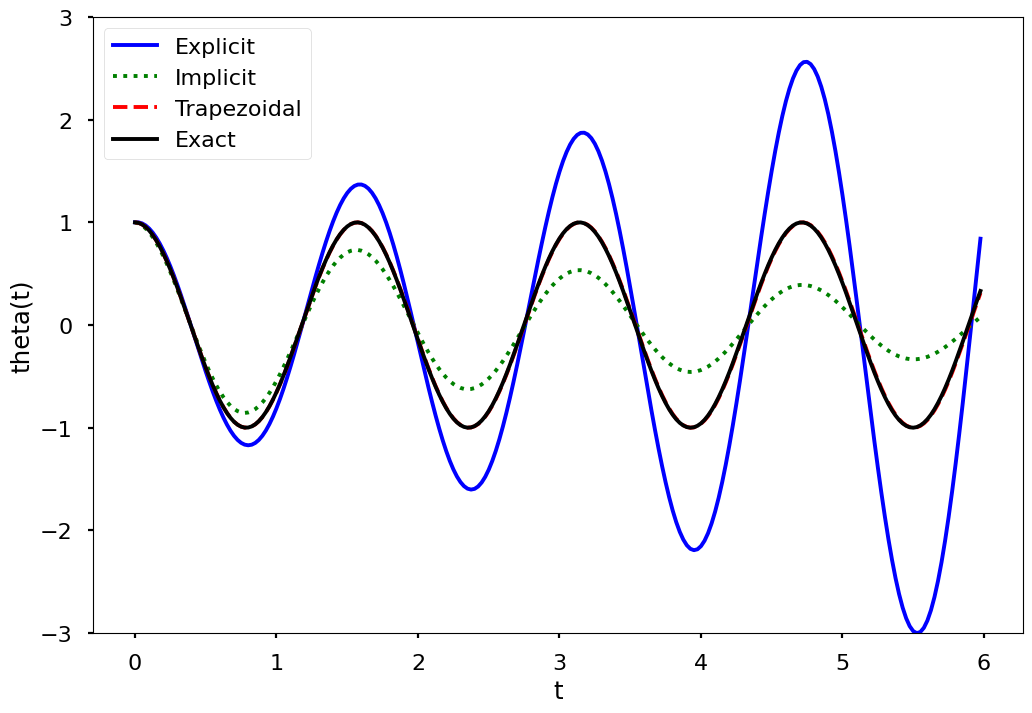

In [2]:

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

# define step size
h = 0.025
# define numerical grid
t = np.arange(0, 6, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('theta(t)')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

# 22.5 Predictor-Corrector and Runge Kutta Methods
Predictor-Corrector Methods - (Solving IVPs) - This improve the approximation accuracy of non-predictor-corrector methods by querying the F function several times at different locations(predictions), and then using a weighted average of the results(corrections) to update the state.

Predictor - An explicit formula and 1st estimates the solution at t_j+1. Eulers or another method can be used to finish this step.

Corrector - Can be applied to improve accuracy after obtaining the solution S(t_j+1)

Midpoint Method - Has a predictor step which is the prediction of the solution value halfway between t_j and t_jplus1. It then computes the corrector step using the derivative from S(t_j + h/2).


S(t_j + h/2) = S(t_j) + (h/2)F(t_j , S(t_j))

Runge Kutta Methods (RK) - Based on truncated Taylor series

Fourth Order Runge Kutta (RK4) - Obtained from the Taylor series using four points k1, k2, k3, and k4. A weighted average is used to find the approximation of the solution, which is O(h^4) (4th order accurate)



k1 = F(t_j , S(t_j))


k2 = F(t_j + h/2 , S(t_j) + (1/2)k1*h)


k3 = F(t_j + h/2 , S(t_j) + (1/2)k2*h)


k4 = F(t_j + h , S(t_j) + k3*h)
S(t_jplus1) = S(t_j) + (h/6)(k1 + 2k2 + 2k3 + k4)

# Section 22.6 Python ODE Solvers
solve_ivp(fun, t_span, s0, method='RK45', t_eval=None)


fun = Takes in function in the right-hand side of the system.


t_span = Interval of integration (t0, tf). t0 is the start, and tf is the end of the interval.


s0 = Initial state.


'RK45' = default Runge Kutta method - explicit Runge Kutta method of order 5(4)


t_eval = takes in times a which to store the computed solution, must be sorted and lie within t_span.

<ipython-input-3-effa116fe9ba>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


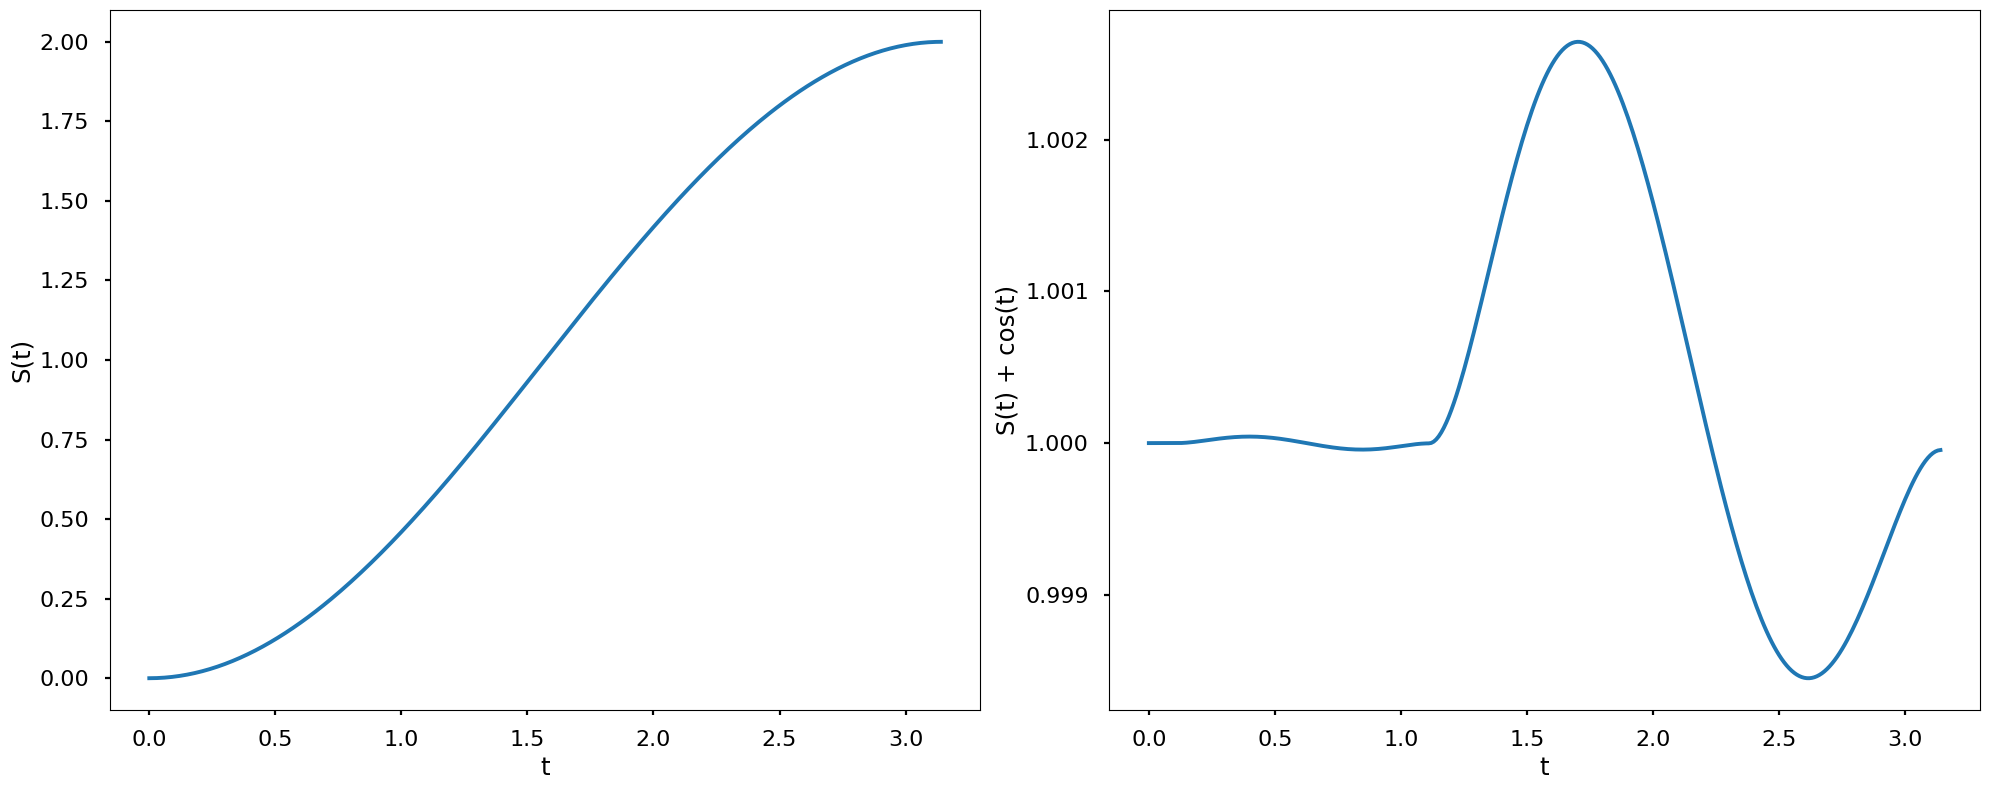

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

Fx = lambda t, st: np.sin(t)

t_eval = np.arange(0, np.pi, 0.01)
sol = solve_ivp(Fx, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.tight_layout()
plt.show()

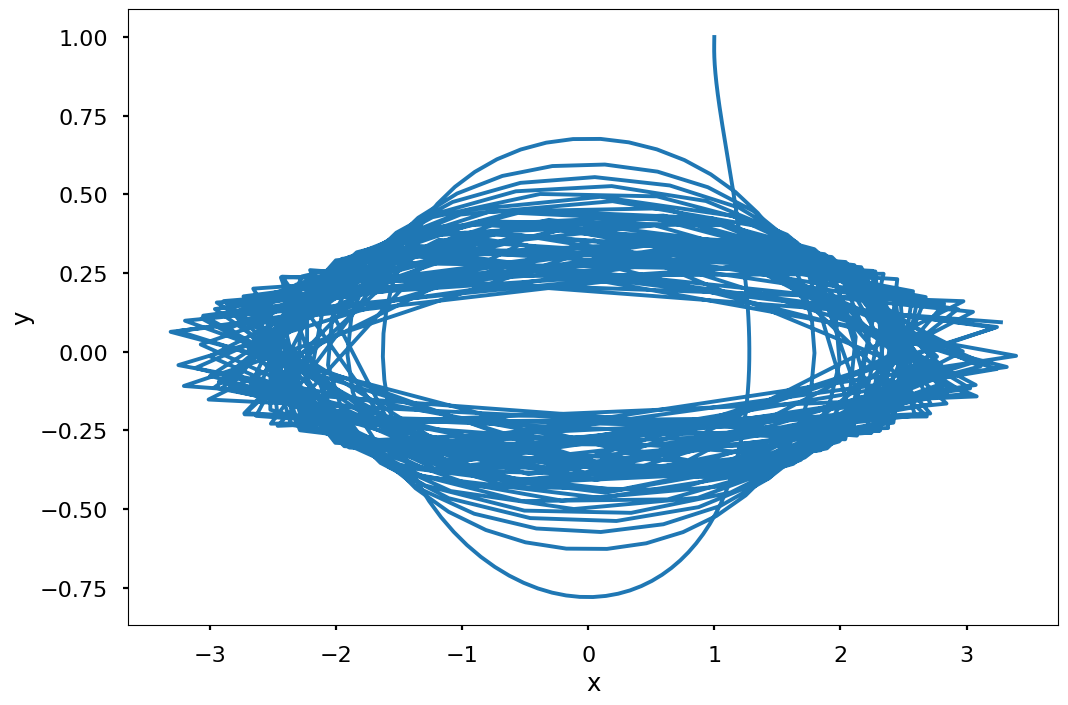

In [4]:
F = lambda t, s: np.dot(np.array([[0, t**3], [-t, 0]]), s)

t_eval = np.arange(0, 10.02, 0.02)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()